In [2]:
import pandas as pd
from scipy import stats

In [3]:
BASE = "../analysis/"

matriz = pd.read_csv(BASE + "matriz_presencia_ausencia_amr.csv", index_col=0)
amr = pd.read_csv(BASE + "amr_master.tsv", sep="\t")

In [4]:
freq_clase = (
    amr.groupby(["Species","Class"])
       .size()
       .unstack(fill_value=0)
)

freq_clase.to_csv(BASE + "tabla_clases_por_especie.csv")

freq_clase

Class,AMINOGLYCOSIDE,BETA-LACTAM,COLISTIN,MACROLIDE,MACROLIDE/STREPTOGRAMIN,PHENICOL,QUATERNARY AMMONIUM,QUINOLONE,RIFAMYCIN,SULFONAMIDE,TETRACYCLINE,TRIMETHOPRIM
Species,,,,,,,,,,,,
V_alginolyticus,3,25,0,0,0,0,1,4,0,3,50,2
V_cholerae,13,27,72,2,1,22,3,0,1,8,2,2
V_parahaemolyticus,2,25,0,0,0,0,0,0,0,1,53,0
V_vulnificus,2,1,0,0,0,1,0,1,0,2,25,0


In [5]:
chi2, p, dof, expected = stats.chi2_contingency(freq_clase)

print("Chi2:", chi2)
print("p-value:", p)

Chi2: 253.79861896139602
p-value: 6.80497928560479e-36


In [6]:
diversidad = matriz.sum(axis=1)

diversidad.to_csv(BASE + "diversidad_genica_por_especie.csv")

diversidad

Species
V_alginolyticus       16
V_cholerae            28
V_parahaemolyticus    13
V_vulnificus           9
dtype: int64

In [7]:
stats.shapiro(diversidad)

ShapiroResult(statistic=np.float64(0.9143934345671441), pvalue=np.float64(0.5059863082998926))

In [8]:
grupos = [diversidad[matriz.index == sp] for sp in matriz.index]

stats.kruskal(*grupos)

KruskalResult(statistic=np.float64(3.0), pvalue=np.float64(0.3916251762710877))

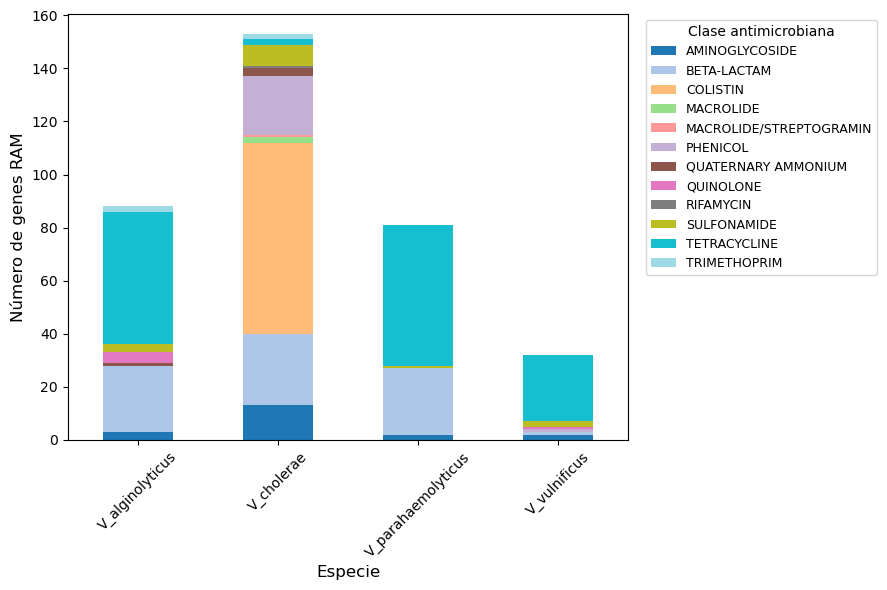

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,6))

freq_clase.plot(
    kind="bar",
    stacked=True,
    colormap="tab20",
    ax=ax
)

ax.set_ylabel("Número de genes RAM", fontsize=12)
ax.set_xlabel("Especie", fontsize=12)

ax.legend(
    title="Clase antimicrobiana",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize=9
)

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(BASE + "stacked_clases_resistencia.png",
            dpi=300,
            bbox_inches='tight')

plt.show()